<a href="https://colab.research.google.com/github/SSaberipouya/-Predicted-superconducting-critical-temperatures-K-/blob/master/Superconductivity_Data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict the critical temperature based on the features extracted using Artificial Neural Network

### Importing the libraries

In [94]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [95]:
tf.__version__

'2.3.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [96]:
dataset = pd.read_csv('train.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [97]:
X

array([[ 4.  , 88.94, 57.86, ...,  1.09,  0.43,  0.44],
       [ 5.  , 92.73, 58.52, ...,  1.13,  0.63,  0.47],
       [ 4.  , 88.94, 57.89, ...,  1.11,  0.43,  0.44],
       ...,
       [ 2.  , 99.66, 95.61, ...,  3.2 ,  0.5 ,  0.4 ],
       [ 2.  , 99.66, 97.1 , ...,  2.21,  0.5 ,  0.46],
       [ 3.  , 87.47, 86.86, ...,  1.8 ,  1.41,  1.5 ]])

### Splitting the dataset into the Training set and Test set

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Part 2 - Building the ANN

### Initializing the ANN

In [106]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [107]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [108]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [109]:
ann.add(tf.keras.layers.Dense(units=1))

## Part 3 - Training the ANN

### Compiling the ANN

In [110]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Training the ANN model on the Training set

In [113]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
532/532 [==============================] - 1s 2ms/step - loss: 259.5539
Epoch 2/100
532/532 [==============================] - 1s 2ms/step - loss: 253.2380
Epoch 3/100
532/532 [==============================] - 1s 2ms/step - loss: 258.7448
Epoch 4/100
532/532 [==============================] - 1s 1ms/step - loss: 256.0149
Epoch 5/100
532/532 [==============================] - 1s 1ms/step - loss: 258.3920
Epoch 6/100
532/532 [==============================] - 1s 1ms/step - loss: 258.6342
Epoch 7/100
532/532 [==============================] - 1s 1ms/step - loss: 266.4715
Epoch 8/100
532/532 [==============================] - 1s 1ms/step - loss: 257.5913
Epoch 9/100
532/532 [==============================] - 1s 2ms/step - loss: 252.7754
Epoch 10/100
532/532 [==============================] - 1s 1ms/step - loss: 256.6287
Epoch 11/100
532/532 [==============================] - 1s 2ms/step - loss: 258.2202
Epoch 12/100
532/532 [==============================] - 1s 1ms/step - loss

### Predicting the results of the Test set

In [114]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[57.85 85.  ]
 [56.8  85.5 ]
 [25.04 11.6 ]
 ...
 [21.76  0.46]
 [22.53 34.  ]
 [59.8  16.5 ]]


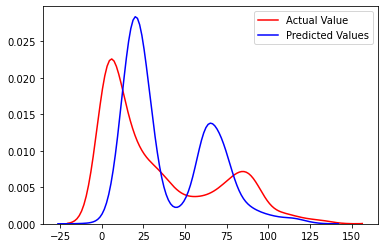

In [119]:
import seaborn as sns
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax1)

Text(0, 0.5, 'Predicted Critical Temperature (K)')

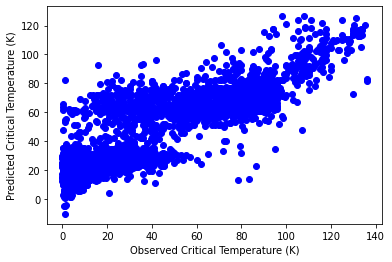

In [127]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Observed Critical Temperature (K)')
plt.ylabel('Predicted Critical Temperature (K)')